In [ ]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

In [ ]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [ ]:
positive = twitter_samples.strings('positive_tweets.json')
negative = twitter_samples.strings('negative_tweets.json')

In [ ]:
print('Number of positive tweets: ', len(positive))
print('Number of negative tweets: ', len(negative))


Number of positive tweets:  5000
Number of negative tweets:  5000


In [ ]:
print(type(positive))
print(type(negative))

<class 'list'>
<class 'list'>


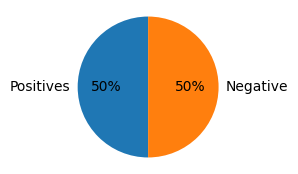

In [ ]:
fig = plt.figure(figsize=(2,2))
labels = 'Positives', 'Negative'
sizes = [len(positive), len(negative)]
plt.pie(sizes, labels=labels, autopct='%1.0f%%',shadow=False, startangle=90)
plt.axis('equal')

plt.show()

In [ ]:
print('\033[92m'+ positive[random.randint(0,5000)])

#nsn_supplements, Effective press release distribution with results! :) [link removed] #PressRelease #NewsDistribution


In [ ]:
print('\033[91m'+ negative[random.randint(0,5000)])

I wish more people did 11:11s for me :(


**Preprocessing**
1. Tokenizing the string
2. Lowercasing
3. Removing stop words and punctuation
4. Stemming

In [ ]:
tweet = positive[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re
import string

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [ ]:
print('\033[92m' + tweet)


My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


Removing Hyperlinks , hastags

In [ ]:
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

In [ ]:
print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [ ]:
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)

# remove hashtags
tweet2 = re.sub(r'[#@:!)]', '', tweet2)

In [ ]:
print(tweet2)

My beautiful sunflowers on a sunny Friday morning off  sunflowers favourites happy Friday off… 


Tokenization

In [ ]:
print('\033[92m' + tweet2)

My beautiful sunflowers on a sunny Friday morning off  sunflowers favourites happy Friday off… 


In [ ]:
tokenizer = TweetTokenizer(preserve_case = False,reduce_len=True,strip_handles=True)

In [ ]:
token = tokenizer.tokenize(tweet2)
print(token)

['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


Removing stopwords and punctuations

In [ ]:
st = stopwords.words('english')
print(st)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
print('\033[92m')
print(token)


['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


In [ ]:
t=[]
for word in token:
  if(word not in st) and (word not in string.punctuation):
    t.append(word)
print(t)

['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', 'sunflowers', 'favourites', 'happy', 'friday', '…']


Stemming

In [ ]:
stemmer = PorterStemmer()
stem = []
for word in t:
  stemmed = stemmer.stem(word)
  stem.append(stemmed)

print(stem)

['beauti', 'sunflow', 'sunni', 'friday', 'morn', 'sunflow', 'favourit', 'happi', 'friday', '…']



Processing

In [ ]:
!pip uninstall utils
!pip install utils



Found existing installation: utils 1.0.1
Uninstalling utils-1.0.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/tests/*
    /usr/local/lib/python3.10/dist-packages/utils-1.0.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/utils/*
Proceed (Y/n)? Y
  Successfully uninstalled utils-1.0.1
  Using cached utils-1.0.1-py2.py3-none-any.whl (21 kB)


In [ ]:
def process_tweet(tweet):
  stemmer = PorterStemmer()
  stopwords_english = stopwords.words('english')
  tweet = re.sub(r'\$\w*', '', tweet)
  tweet = re.sub(r'^RT[\s]+', '', tweet)
  tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
  tweet = re.sub(r'#', '', tweet)
  tokenizer = TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)
  tweet_tokens = tokenizer.tokenize(tweet)

  tweets_clean = []
  for word in tweet_tokens:
      if (word not in stopwords_english and
              word not in string.punctuation):
          stem_word = stemmer.stem(word)  # stemming word
          tweets_clean.append(stem_word)

  return tweets_clean

In [ ]:
import numpy as np


In [ ]:
m = positive+negative
print(len(m))

10000


In [ ]:
def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

**process_tweet()**: Cleans the text, tokenizes it into separate words, removes stopwords, and converts words to stems.

**build_freqs()**: This counts how often a word in the 'corpus' (the entire set of tweets) was associated with a positive label 1 or a negative label 0. It then builds the freqs dictionary, where each key is a (word,label) tuple, and the value is the count of its frequency within the corpus of tweets.

In [ ]:
freqs = build_freqs(m,labels)